In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
income_data_raw = pd.read_excel("C:\\Users\\raosw\\OneDrive\\Documents\\Python Scripts\\income.xlsx")
income_data_raw.head()

,Continent,Country,Population (millions),Poor,Low,Middle,Upper Middle,High
0,Africa,Angola,20.2,6.5,12.5,1.0,0.2,0.0
1,Africa,Burkina Faso,16.0,9.2,6.6,0.2,0.0,0.0
2,Africa,Burundi,9.5,7.6,1.9,0.0,0.0,0.0
3,Africa,Cameroon,21.2,2.6,16.2,1.9,0.5,0.0
4,Africa,Central African Republic,4.4,3.0,1.4,0.1,0.0,0.0


In [54]:
income_data_raw.Country.unique()

array(['Angola', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', "Côte d'Ivoire", 'Egypt', 'Ethiopia',
       'Ghana', 'Guinea', 'Kenya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Morocco', 'Mozambique', 'Niger', 'Nigeria',
       'Rwanda', 'Senegal', 'Seychelles', 'Sierra Leone', 'South Africa',
       'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia',
       'Armenia', 'Australia', 'Bangladesh', 'Bhutan', 'Cambodia',
       'China1', 'Fiji', 'Georgia', 'India', 'Indonesia', 'Iran',
       'Israel', 'Jordan', 'Kazakhstan', 'Kyrgyzstan', 'Laos', 'Malaysia',
       'Nepal', 'Pakistan', 'Philippines', 'Sri Lanka', 'Taiwan',
       'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Vietnam',
       'Yemen', 'Costa Rica', 'Dominican Republic', 'El Salvador',
       'Guatemala', 'Honduras', 'Nicaragua', 'Panama', 'Albania',
       'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Czech Republic', 'Estonia', 'Hungary', 'La

Please enter First country:
India
Please enter Second country:
Sri Lanka


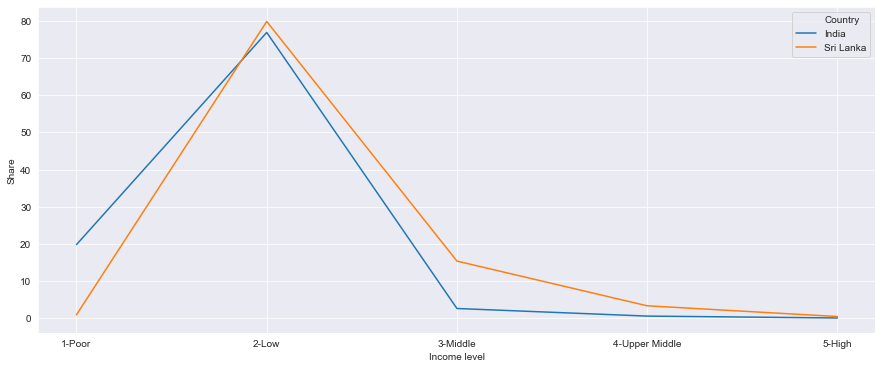

In [72]:
value1 = input("Please enter First country:\n")
value2 = input("Please enter Second country:\n")

ind_US_data = income_data_raw[income_data_raw['Country'].isin([value1,value2])]
ind_US_data = ind_US_data.rename(columns={'Poor': '1-Poor', 'Low': '2-Low','Middle': '3-Middle', 'Upper Middle': '4-Upper Middle','High': '5-High'})
formatted_ind_US = ind_US_data.melt(id_vars='Country',value_vars = ["1-Poor","2-Low","3-Middle","4-Upper Middle","5-High"],var_name="Income level",
                 value_name="Population").sort_values(["Country","Income level"]).reset_index().drop('index',axis=1)

country_pop =formatted_ind_US.groupby('Country').sum().reset_index()
pop_merge = formatted_ind_US.merge(country_pop,how="inner",on="Country")
pop_merge['Share'] = pop_merge['Population_x']/pop_merge['Population_y']*100

fig, ax = plt.subplots(figsize=(15,6))
sns.set_style(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(ax=ax,x="Income level", y="Share",
             hue="Country",
             data=pop_merge,sort=True)